#StarWars

스타워즈의 캐릭터들의 특징을 나타내는 데이터셋이다.

Data_From : https://dplyr.tidyverse.org/reference/starwars.html

In [8]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
plt.style.use('seaborn') # 기본그래프 seaborn으로 설정하기. 
sns.set(font_scale =1)

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [3]:
sw = pd.read_csv('/content/drive/MyDrive/dataset/LAB_dataset/Starwars.csv')

In [4]:
sw.head(5)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


<컬럼 설명>

name : 이름

height : 키

mass : 몸무게

hair_color : 머리색상 , eye_color : 눈동자색상

birth_year : 출생년도

sex : 생물학적 성

gender : 사회학적 성

homeworld : 고향

species : 종


- 범주형 변수 :

name : 이름 ,

hair_color : 머리색상, eye_color : 눈동자색상 ,
 
sex : 생물학적 성

gender : 사회학적 성

homeworld : 고향

species : 종



---

- 연속형 변수 :

height : 키

mass : 몸무게

birth_year : 출생년도



In [5]:
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [6]:
sw.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [9]:
sw.describe(include=np.object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [13]:
sw_col=list(sw.columns)

for i in sw_col :
  print(i,' : ',sw[i].unique(),'\n\n')


name  :  ['Luke Skywalker' 'C-3PO' 'R2-D2' 'Darth Vader' 'Leia Organa' 'Owen Lars'
 'Beru Whitesun lars' 'R5-D4' 'Biggs Darklighter' 'Obi-Wan Kenobi'
 'Anakin Skywalker' 'Wilhuff Tarkin' 'Chewbacca' 'Han Solo' 'Greedo'
 'Jabba Desilijic Tiure' 'Wedge Antilles' 'Jek Tono Porkins' 'Yoda'
 'Palpatine' 'Boba Fett' 'IG-88' 'Bossk' 'Lando Calrissian' 'Lobot'
 'Ackbar' 'Mon Mothma' 'Arvel Crynyd' 'Wicket Systri Warrick' 'Nien Nunb'
 'Qui-Gon Jinn' 'Nute Gunray' 'Finis Valorum' 'Jar Jar Binks'
 'Roos Tarpals' 'Rugor Nass' 'Ric Oli?' 'Watto' 'Sebulba' 'Quarsh Panaka'
 'Shmi Skywalker' 'Darth Maul' 'Bib Fortuna' 'Ayla Secura' 'Dud Bolt'
 'Gasgano' 'Ben Quadinaros' 'Mace Windu' 'Ki-Adi-Mundi' 'Kit Fisto'
 'Eeth Koth' 'Adi Gallia' 'Saesee Tiin' 'Yarael Poof' 'Plo Koon'
 'Mas Amedda' 'Gregar Typho' 'Cord?' 'Cliegg Lars' 'Poggle the Lesser'
 'Luminara Unduli' 'Barriss Offee' 'Dorm?' 'Dooku' 'Bail Prestor Organa'
 'Jango Fett' 'Zam Wesell' 'Dexter Jettster' 'Lama Su' 'Taun We'
 'Jocasta Nu' 'Ratts Ty

- 총결측치수의 비율

In [18]:
print('percent of NaN : {:.2f}% of 100.00%'.format((sw.isnull().sum().sum()*100) / (sw.shape[0] * sw.shape[1])))

percent of NaN : 10.97% of 100.00%


- 등장인물과 종족의 수

In [21]:
print('등장인물 :',sw['name'].nunique())

print('종족의 수 : ',sw['species'].nunique())

등장인물 : 87
종족의 수 :  37


- 등장인물의 성별 분포


- 성별에 따른 신장 분포


- 최대 몸무게와 최소 몸무게


- 키와 몸무게의 상관관계

# 데이터 정비하기.



> 결측치 처리하기



In [25]:
sw.isnull().any(axis=0)

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

- 처음에 다 채우고 할 필요는 없다.

In [29]:
sw.isnull().sum()

name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

- 성별이나 머리색, 고향, 종의 경우 개인특성이므로 다른 값을 넣어주는 것은 의미가 없다.

In [27]:
sw['height'].fillna(0,inplace=True)

sw['mass'].fillna(0,inplace=True)

In [31]:
sw[sw['sex']=='none']

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,none,masculine,Tatooine,Droid
21,IG-88,200.0,140.0,none,metal,red,15.0,none,masculine,NaN,Droid
72,R4-P17,96.0,0.0,none,"silver, red","red, blue",NaN,none,feminine,NaN,Droid
84,BB8,0.0,0.0,none,none,black,NaN,none,masculine,NaN,Droid


- 로봇이기 때문에 성별이 None

In [32]:
sw[sw['sex'].isnull()]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
36,Ric Oli?,183.0,0.0,brown,fair,blue,NaN,NaN,NaN,Naboo,NaN
39,Quarsh Panaka,183.0,0.0,black,dark,brown,62.0,NaN,NaN,Naboo,NaN
79,Sly Moore,178.0,48.0,none,pale,white,NaN,NaN,NaN,Umbara,NaN
85,Captain Phasma,0.0,0.0,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN


In [33]:
sw['sex'][sw['sex']=='none'] = 'robot'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
sw['sex'].unique()

array(['male', 'robot', 'female', 'hermaphroditic', nan], dtype=object)

# EDA / Visualization

In [37]:
sw['gender'].value_counts()

sw['sex'].value_counts()

male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64

Text(0, 0.5, '')

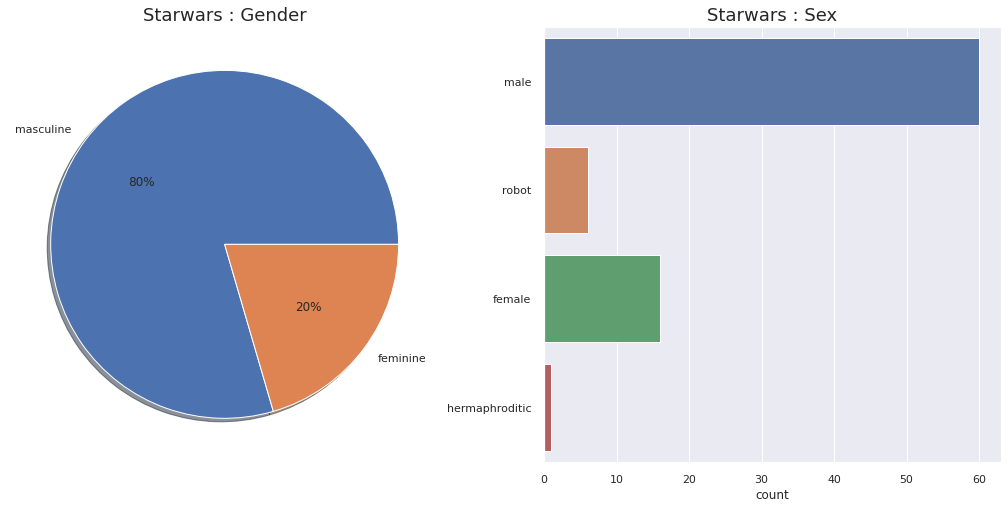

In [39]:
f , ax = plt.subplots(1,2,figsize=(18,8))

#sns.pieplot

sw['gender'].value_counts().plot.pie(ax=ax[0],autopct='%1.0f%%',shadow=True)
ax[0].set_title('Starwars : Gender',size=18)
ax[0].set_ylabel('')
# sns .countplot

sns.countplot(data=sw,y='sex',ax=ax[1])
ax[1].set_title('Starwars : Sex',size=18)
ax[1].set_ylabel('')

- 성별에 따른 신장분포

In [41]:
sw['height'].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [44]:
'''Skewness(왜도) : 데이터가 정규분포에서 한쪽으로 치우쳐있는가?
                  -3 < skewness < 3 사이의 값이면 기준에 부합한다.
   Kurtosis(첨도) : 얼마나 뾰족한가(데이터가 얼마나 평균 근처에 몰려있는가)?
                  : 정규 분포의 kurtosis = 0

'''

print('skewness : %f' % sw['height'].skew())

print('kurtosis : %f' % sw['height'].kurt())
              

skewness : -1.760878
kurtosis : 2.927697


- 자웅동체 캐릭터는 하나뿐이므로, 확률분포를 구하는 것이 불가능하다.

In [45]:
sw[sw['sex']=='hermaphroditic'].head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt


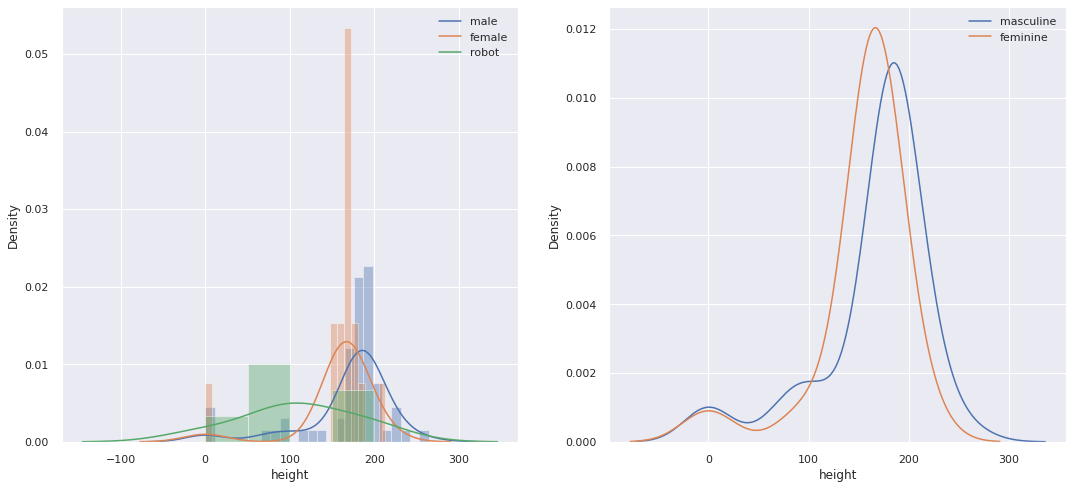

In [49]:
f , ax = plt.subplots(1,2,figsize=(18,8))

sns.distplot(sw[sw['sex']=='male']['height'],ax=ax[0])
sns.distplot(sw[sw['sex']=='female']['height'],ax=ax[0])
sns.distplot(sw[sw['sex']=='robot']['height'],ax=ax[0])

ax[0].legend(['male','female','robot'])

#kdeplot

sns.kdeplot(sw[sw['gender']=='masculine']['height'],ax=ax[1])
sns.kdeplot(sw[sw['gender']=='feminine']['height'],ax=ax[1])

ax[1].legend(['masculine','feminine'])

- 가장 가벼운 캐릭터와 무거운 캐릭터

In [51]:
notz = sw[sw['mass']!=0]

min(notz['mass'])

15.0

In [63]:
print('{}'.format(notz[notz['mass']==min(notz['mass'])]['name']))

71    Ratts Tyerell
Name: name, dtype: object
